# Programming and Critical analysis

Ridge Regression
MAE: 0.16283


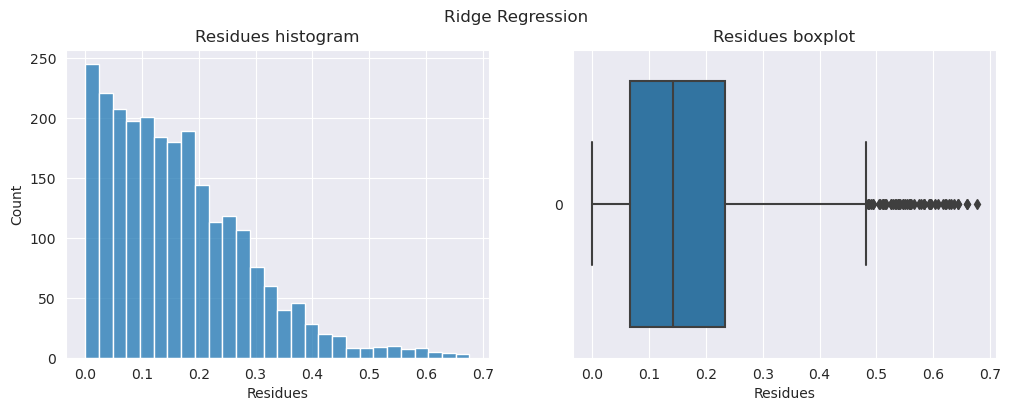

/usr/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:621: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP 1
MAE: 0.15292
Iterations: 500


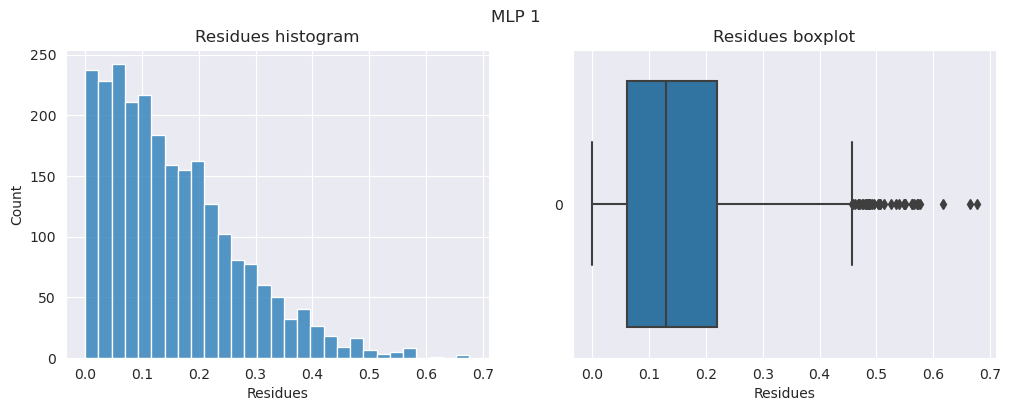

MLP 2
MAE: 0.18339
Iterations: 179


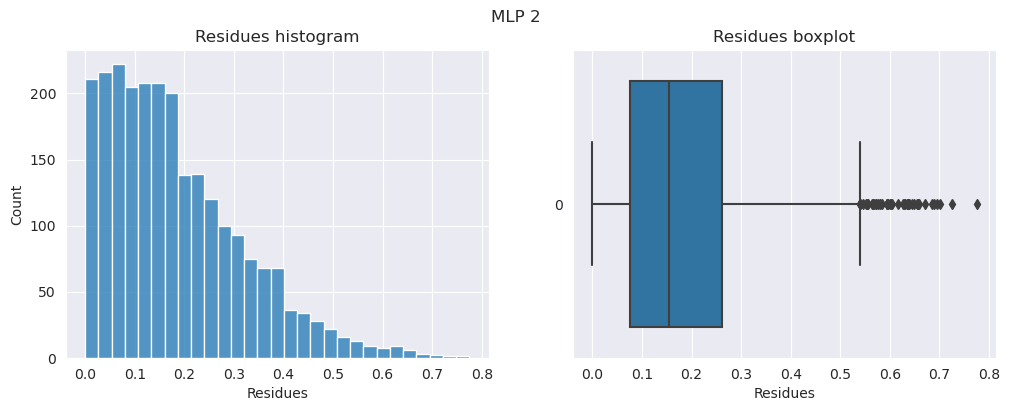

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io.arff import loadarff
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor
sns.set_style('darkgrid')

# Load data
data = loadarff('data/kin8nm.arff')
df = pd.DataFrame(data[0])

X = df.drop('y', axis=1).values
y = df['y'].values

X_train, X_test, y_train, y_test = train_test_split(
  X, y,
  test_size=0.3,
  random_state=0
)

def predict(regressor):
  regressor.fit(X_train, y_train)
  return regressor.predict(X_test)

def plot_regressor_residues(regressor, description, y_pred):
  """Utilized for answering question 2."""
  residues = np.abs(y_test - y_pred)

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
  sns.histplot(data=residues, ax=ax1)
  ax1.set_title('Residues histogram')
  ax1.set_xlabel('Residues')
  sns.boxplot(data=residues, ax=ax2, orient='h')
  ax2.set_title('Residues boxplot')
  ax2.set_xlabel('Residues')
  plt.suptitle(description)
  plt.show()

def print_regressor(regressor, description, y_pred):
  """Utilized for answering questions 1. and 3."""
  print(description)
  print('MAE: {:.5f}'.format(mean_absolute_error(y_test, y_pred)))
  if "MLP" in description:
    print('Iterations: {}'.format(regressor.n_iter_))

regressors = {
  "Ridge Regression": Ridge(alpha=0.1),
  "MLP 1": MLPRegressor(
    hidden_layer_sizes=(10, 10),
    activation='tanh',
    max_iter=500,
    random_state=0,
    early_stopping=True
  ),
  "MLP 2": MLPRegressor(
    hidden_layer_sizes=(10, 10),
    activation='tanh',
    max_iter=500,
    random_state=0
  )
}

for description, regressor in regressors.items():
  y_pred = predict(regressor)
  print_regressor(regressor, description, y_pred)
  plot_regressor_residues(regressor, description, y_pred)

----

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   theta1  8192 non-null   float64
 1   theta2  8192 non-null   float64
 2   theta3  8192 non-null   float64
 3   theta4  8192 non-null   float64
 4   theta5  8192 non-null   float64
 5   theta6  8192 non-null   float64
 6   theta7  8192 non-null   float64
 7   theta8  8192 non-null   float64
 8   y       8192 non-null   float64
dtypes: float64(9)
memory usage: 576.1 KB
